In [2]:
intro_images_path='./Images/Intro_images/'
edge_images_path='../'#../Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='./Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2022/23


<img src="./Logotipo_Solo.png" width=200/>

## Image  geometric transformations




http://szeliski.org/Book/

https://docs.opencv.org/4.3.0/da/d6e/tutorial_py_geometric_transformations.html

There can be a number of basic operations we can perform in an image. OpenCV provides two transformation functions, **cv.warpAffine** and **cv.warpPerspective**, with which you can perform all kinds of transformations. cv.warpAffine takes a 2x3 transformation matrix while cv.warpPerspective takes a 3x3 transformation matrix as input.

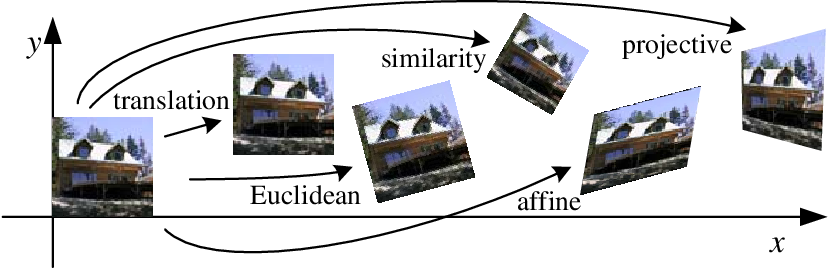


### Image translation

Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be (tx,ty), you can create the transformation matrix M as follows:

    M=[[1, 0, tx],
       [0, 1, ty]]
   





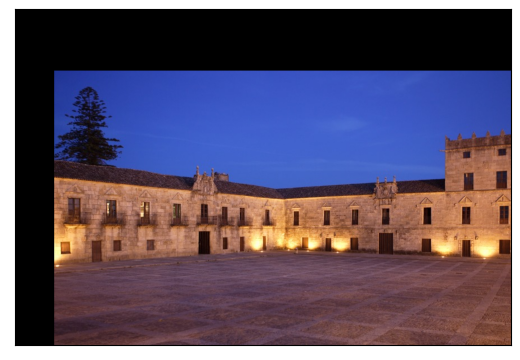

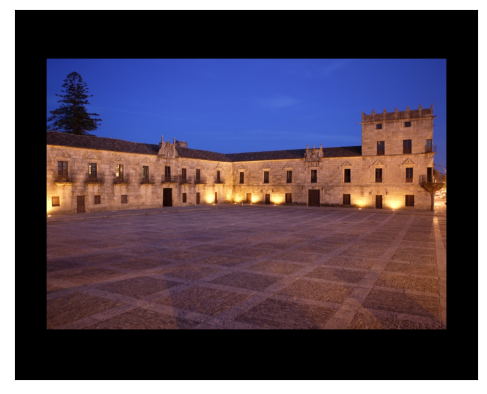

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys

# Load an color image in grayscale
img = cv2.imread(intro_images_path +'pazo.jpg')

if img is None:
  sys.exit('Failing at loading image')

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
#translation with image cropping
img_tc = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)

plt.imshow(img_tc)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#translation without image cropping
img_t = cv2.warpAffine(img, translation_matrix, (num_cols+ 2*int(translation_matrix[0,2]), num_rows+ 2*int(translation_matrix[1,2])), cv2.INTER_LINEAR)

plt.imshow(img_t)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Image rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

    M=[[cosθ,  sinθ],
       [−sinθ, cosθ]]

OpenCV also provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer.The modified transformation matrix is given by

    M=[[α,  β, (1−α)⋅center.x−β⋅center.y], 
       [-β  α, β⋅center.x+(1−α)⋅center.y]]

where:

    α=scale⋅cosθ,
    β=scale⋅sinθ

To find this transformation matrix, write the affine transformation yourself and call OpenCv functions **cv2.warpAffine(image, M, output_shape)**. Alternatively, OpenCV provides a function, **cv.getRotationMatrix2D(center, angle, scale)**.


#### Alternative 1

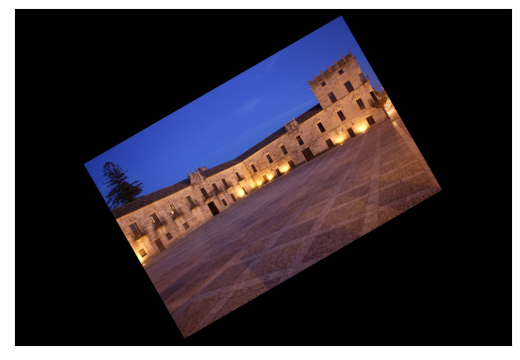

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 


def get_affine_cv(t, r, s):
    sin_theta = np.sin(r)
    cos_theta = np.cos(r)
    
    a_11 = s * cos_theta
    a_21 = -s * sin_theta
    
    a_12 = s * sin_theta
    a_22 = s * cos_theta
        
    a_13 = t[0] * (1 - s * cos_theta) - s * sin_theta * t[1]
    a_23 = t[1] * (1 - s * cos_theta) + s * sin_theta * t[0]
                                                          
    return np.array([[a_11, a_12, a_13],[a_21, a_22, a_23]])

#Load an image 
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

                    
M = get_affine_cv(center, np.deg2rad(angle), scale)

img_r = cv2.warpAffine(img, M, (cols, rows))
                    
plt.imshow(img_r)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### Alternative 2

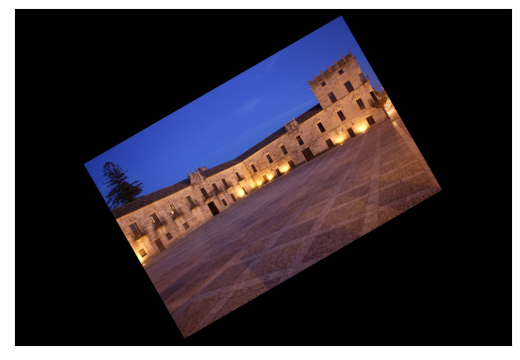

In [5]:
import numpy as np
import cv2 

img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows,cols = img.shape[:2]
center=((cols-1)/2, (rows-1)/2)
angle=30
scale=0.6

M=cv2.getRotationMatrix2D(center, angle, scale)

img_r = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(img_r)
plt.xticks([]), plt.yticks([]) 
plt.show()

### Image scaling

This is a commonly used method in the computer vision and image processing area where we try to resize the image according to the requirement. Roughly we perform two things in the image scaling: either we enlarge the image or we shrink the image; in OpenCV, we have function resize; using this, we can perform the scaling of the image.

Here are the interpolation methods provided by OpenCV:

- cv2.INTER_AREA uses pixel area relation for resampling. This is the best method for reducing the size of an image. When used for zooming into the image, it uses the INTER_NEAREST method.
    
- cv2.INTER_CUBIC uses bicubic interpolation for resizing. This method performs calculations based on the 4×4 neighboring pixels for the pixels. It takes the weighted average of these 16 pixels to create a new pixel.

- cv2.INTER_LINEAR is similar to the INTER_CUBIC interpolation. However, INTER_CUBIC only uses 2×2 neighboring pixels to get the weighted average for the pixels.

- cv2.INTER_NEAREST uses the nearest neighbor concept for interpolation. This uses only one neighboring pixel from the image for interpolation.

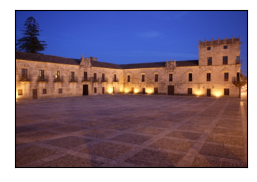

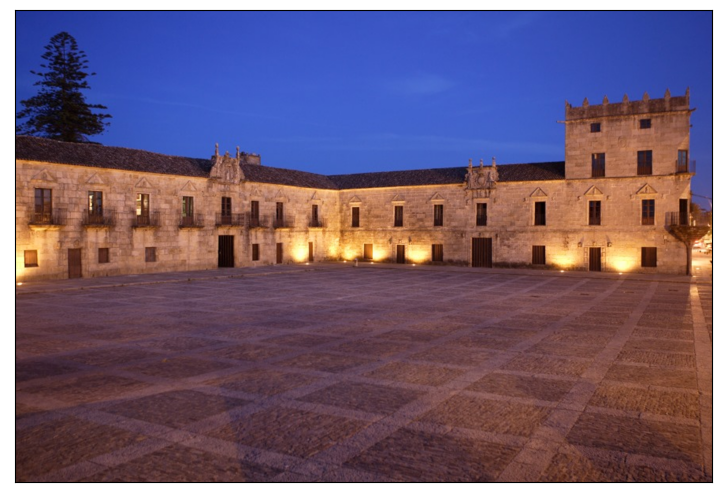

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

img_shrinked = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
plt.figure(figsize= (0.01*img_shrinked.shape[0],0.01*img_shrinked.shape[1]));plt.imshow(img_shrinked)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


img_enlarged = cv2.resize(img,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
plt.figure(figsize= (0.01*img_enlarged.shape[0],0.01*img_enlarged.shape[1]));plt.imshow(img_enlarged)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Affine Transformations

https://docs.opencv.org/4.3.0/df/d9d/tutorial_py_colorspaces.html

https://docs.opencv.org/3.4.2/df/d9d/tutorial_py_colorspaces.html

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

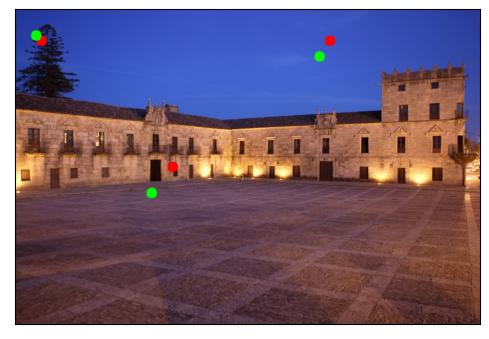

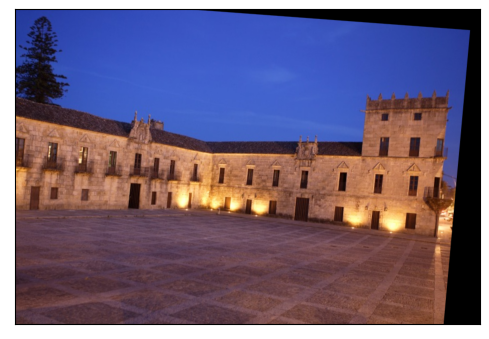

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

image=img.copy()

pts1 = np.float32([[50,60],[600,60],[300,300]])
pts2 = np.float32([[40,50],[580,90],[260,350]])

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Perspective transformation

For perspective transformation you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the first view and corresponding points on the second view. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function **cv2.getPerspectiveTransform**. Then apply **c2v.warpPerspective** with this 3x3 transformation matrix.

The function cv2.warpPerspective() applies a perspective transformation to an image:
dst=cv2.warpPerspective(src, h, dsize)

- src: input image.
- dst: output image that has the size dsize and the same type as src .
- h: homography (3×3 transformation matrix).
- Dsize: size of the output image.

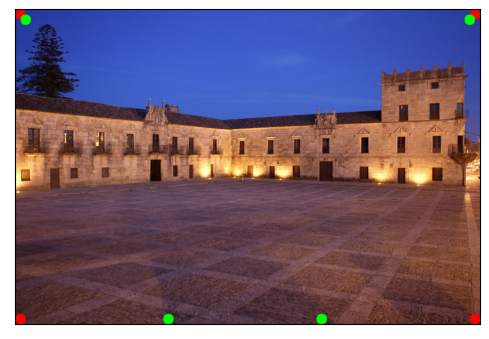

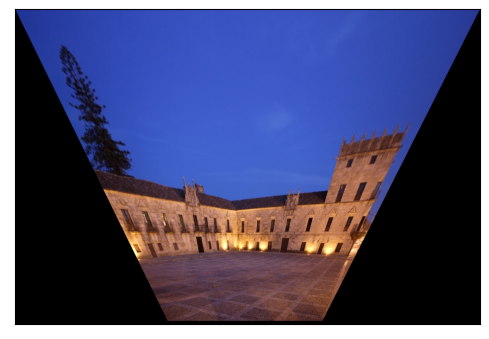

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

#Load an color image in grayscale
img = cv2.imread(intro_images_path+'pazo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

rows, cols=img.shape[:2]
pts1 = np.float32([[10,10], [cols-10,10], [10,rows-10], [cols-10,rows-10]])
pts2 = np.float32([[20,20], [cols-20,20], [int(0.33*cols),rows-10], [int(0.66*cols),rows-10]])

P_M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, P_M, (cols,rows))

image=img.copy()

for pt in pts1:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (255, 0, 0),-1)
for pt in pts2:
    cv2.circle(image, (int(pt[0]), int(pt[1])),10, (0, 255, 0),-1)


plt.figure(figsize= (0.01*image.shape[0],0.01*image.shape[1]));plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.figure(figsize= (0.01*dst.shape[0],0.01*dst.shape[1]));plt.imshow(dst)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



#### Exercise: Compute the homography between two views of the same scene

In [9]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
#WRITE DOWN THEIR COODINATES!!
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


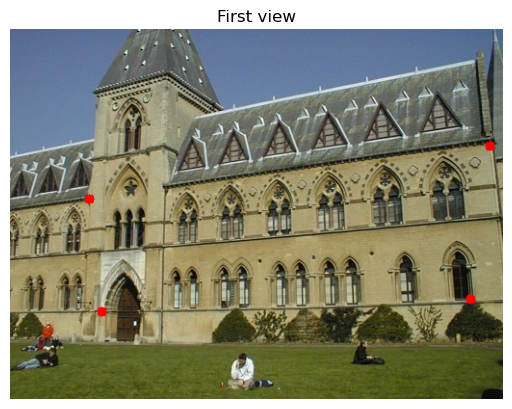

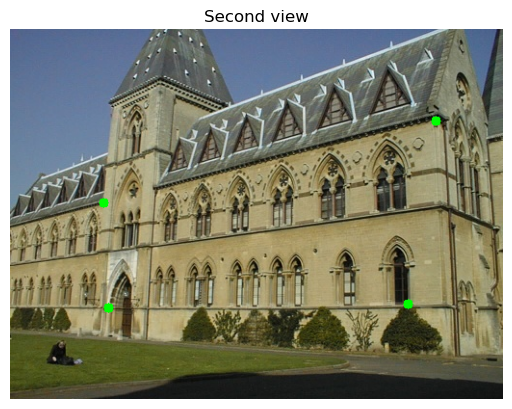

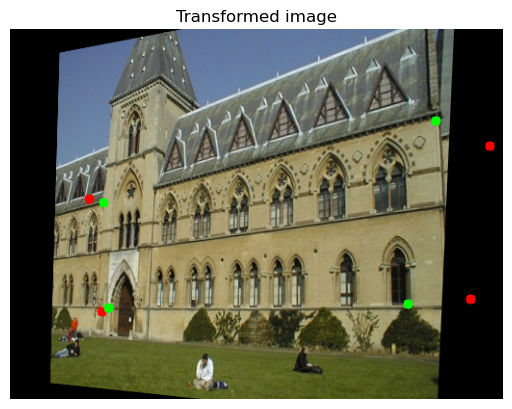

Estimated homography : 
 [[ 5.66066376e-01 -2.40355476e-02  5.12987124e+01]
 [-1.26668550e-01  9.05356791e-01  2.45230135e+01]
 [-5.15884731e-04  3.45153520e-05  1.00000000e+00]]


In [10]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'library1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'library2.jpg', cv2.IMREAD_COLOR) 

im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 


# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

#INSERT HERE THE COORDINATES YOU HAVE WROTE DOWN 
#CHANGING THE CURRENT VALUES!!
points1[0, :] = [82,176]
points1[1, :] = [95,293]
points1[2, :] = [498,121]
points1[3, :] = [478,280]

points2[0, :] = [97,180]
points2[1, :] = [102,289]
points2[2, :] = [442,95]
points2[3, :] = [413,285]

im1c=im1.copy()
im2c=im2.copy()



for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()

# Find homography 

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 


for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

# Print estimated homography 

print("Estimated homography : \n",  h) 

#### Exercise: Combine two images

In [11]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 


## Chose 4 (not all aligned) corresponging points
cv2.imshow('View 1', im1)
cv2.imshow('View 2', im2)

k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()


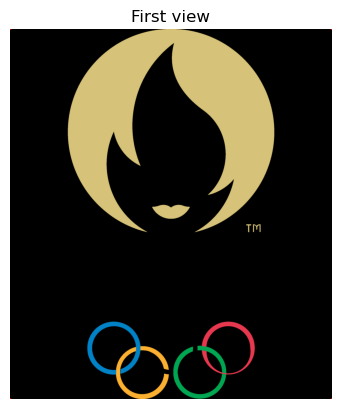

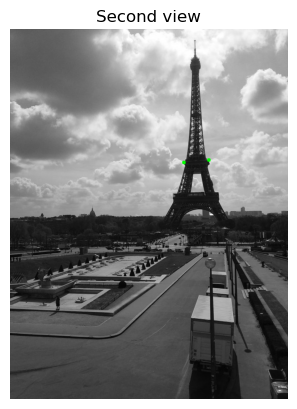

(2486, 2160, 3)


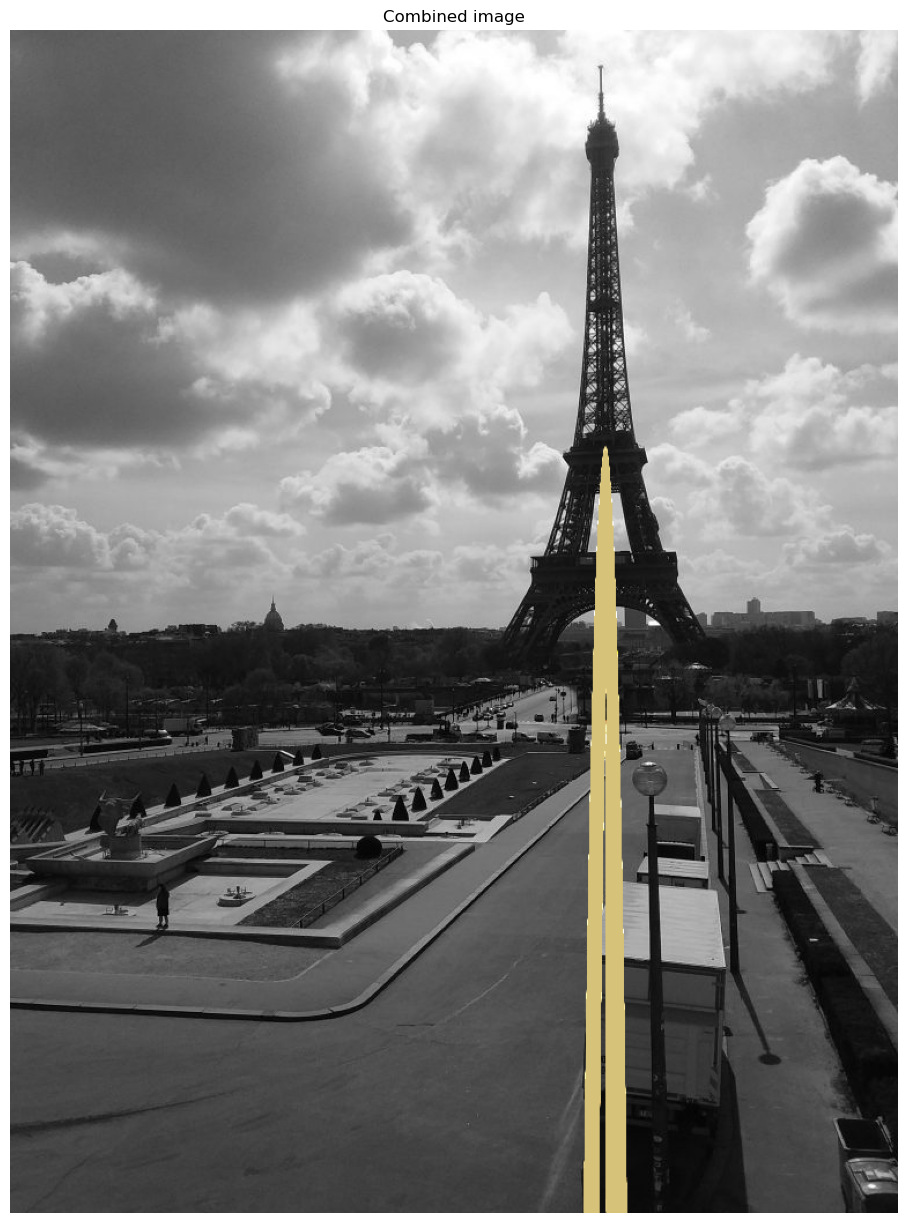

Estimated homography : 
 [[ 3.18076167e-02 -9.03363301e-02  4.79948821e+02]
 [-3.36751949e-03  2.12988418e+00  3.64617635e+02]
 [-3.36751949e-07 -1.74909423e-04  1.00000000e+00]]


In [3]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'Logo_Paris.png', cv2.IMREAD_UNCHANGED) 

# Read second view 
im2 = cv2.imread(intro_images_path+'eiffel.jpg', cv2.IMREAD_COLOR) 

mask=im1[:,:,3]
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

points1[0, :] = [2,2]
points1[1, :] = [2158,2]
points1[2, :] = [2, 2484]
points1[3, :] = [2158,2484]

points2[0, :] = [480,369]
points2[1, :] = [549,362]
points2[2, :] = [452,1000]
points2[3, :] = [574,452]

im1c=im1.copy()
im2c=im2.copy()

for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)
    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()
print(im1c.shape)
# Find homography 
h,_ = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1c.shape 
height2, width2, _ = im2c.shape 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (width2,height2))
maskP= cv2.warpPerspective(mask, h, (width2,height2))

maskP_inv = cv2.bitwise_not(maskP)

im_bg = cv2.bitwise_and(im2,im2,mask = maskP_inv)

im_fg = cv2.bitwise_and(imP,imP,mask = maskP)

res=cv2.add(im_bg,im_fg)# mask=im_mP)

plt.figure(figsize= (0.02*res.shape[0],0.02*res.shape[1]));
plt.imshow(res), plt.title("Combined image")
plt.axis('off')
plt.show()

# Print estimated homography 

print("Estimated homography : \n",  h) 

### Exercise

Transform the image torre_hercules_1.jpg to get a view of the same scene as if it were captured from the same point of view as torre_hercules_2.jpg

## Image point of view transformation

In this functions we will develop a system to dynamically tune-in the point of view of a source image into the point of view of a target image. To do so, we will develop several auxiliar functions and end with a interactive loop that will let us define the points that will define the homomorphism employed in the transformation. 

### Step 1:
Read the source and target images.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Constants definition
intro_images_path = './Images/Intro_images/'
window_name       = 'Image tuner'
key_delay         = 20
circle_color      = (0, 0, 255)
circle_radius     = 10

# Reading
target_image = cv2.imread(intro_images_path+'torre_hercules_2.jpg')
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
trg_y, trg_x, _ = target_image.shape

source_image    = cv2.imread(intro_images_path+'torre_hercules_1.jpg')
source_image    = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
src_y, src_x, _ = source_image.shape

### Step 2: 
Upscale the source image to the target image while keeping aspect ratio to do so, we will employ the fit_on_dimensions function. This function will upscale a source image to fit on given height or width dimensions.

-> Upscaling image to fit in target dimensions...
-> Upscaling to fit on x...


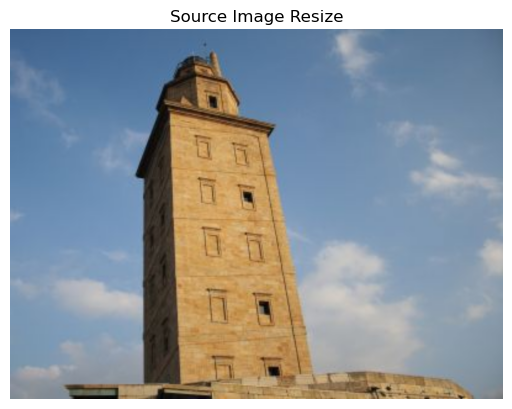

In [2]:
def fit_on_dimensions(image, target_y, target_x):
    '''
    Given an image and target dimensions, this function resizes the image
    to fit on the dimensions while keeping aspect ratio.
    
    @inputs:  image, target_height, target_width
    
    @outputs: image resized keeping aspect ratio scaled 
              to fit in the desired dimensions
    '''
    image_y, image_x, _ = image.shape
    image_ratio = image_x/image_y

    if (image_y < target_y) or (image_x < target_x):
        print("-> Upscaling image to fit in target dimensions...")
        if (target_y < target_x):
            print("-> Upscaling to fit on y...")
            final_y = int(target_y)
            final_x = int(image_ratio * final_y)
        else:
            print("-> Upscaling to fit on x...")
            final_y = int(image_ratio * target_x)
            final_x = int(target_x)
    else:
        print("-> Downscaling image to fit in target dimensions")
        if (target_y > target_x):
            print("-> Downscaling to fit on y...")
            final_y = int(target_y)
            final_x = int(image_ratio * final_y)
        else:
            print("-> Downscaling to fit on x...")
            final_y = int(image_ratio * target_x)
            final_x = int(target_x)
            
    image=cv2.resize(image, (final_y, final_x))
    return image

source_image_resize = fit_on_dimensions(source_image, trg_y, trg_x)
src_r_y, src_r_x, _ = source_image_resize.shape

plt.imshow(source_image_resize), plt.title("Source Image Resize")
plt.axis('off')
plt.show() 

### Step 3: 
Now that we have the images with compatible dimensions we will overlap them in order to be able to place better the homography-defining points. To accomplish this, we will fill create a black image with dimensions of the source_image and insert onto it the target image at a point defined by test-and-error that will match both of the images in a relevant point (in this case, the corner of the tower roof); after that, we will overlap the source_image and the black frame to obtain the image we will use to input the homography points using the openCV add_weighted function that allows us to overlap images with certain transparency.

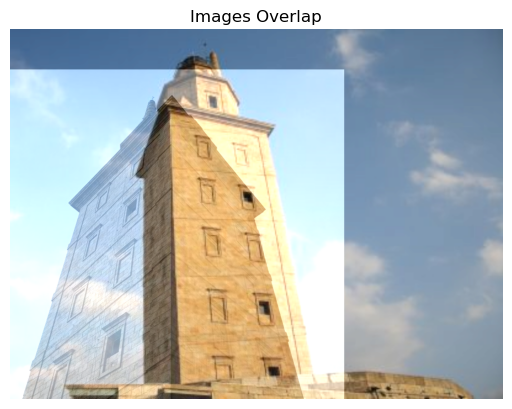

In [3]:
def fit_on_position(image, frame_y, frame_x, pos_y, pos_x):
    '''
    Given a image, a frame dimensions and a starting position
    this function will generate a black frame of (frame_y, frame_x) dimensions
    and plot the image on it placing the image's top-left corner on position
    (pos_y, pos_x). Overflowing parts from the image will be trimmed out
    
    @inputs:  image, frame_dimensions, plot_point.
    
    @outputs: black frame with image plotted at plot_point. 
    '''
    image_y, image_x, _ = image.shape
    frame = np.zeros((frame_y,frame_x,3),np.uint8)

    ## fits x
    if pos_x < 0:
        frame_start_x = 0
        frame_end_x   = pos_x + image_x
        image_start_x = abs(pos_x)
        image_end_x   = image_x
    
    elif pos_x+image_x > frame_x:
        frame_start_x = pos_x
        frame_end_x   = frame_x
        image_start_x = 0
        image_end_x   = frame_x - pos_x
    
    else:
        frame_start_x = pos_x
        frame_end_x   = pos_x + image_x
        image_start_x = 0
        image_end_x   = image_x


    ## fits y
    if pos_y+image_y < 0:
        frame_start_y = 0
        frame_end_y   = pos_y + image_y
        image_start_y = abs(pos_y)
        image_end_y   = image_y
    
    elif pos_y+image_y > frame_y:
        frame_start_y = pos_y
        frame_end_y   = frame_y
        image_start_y = 0
        image_end_y   = frame_y - pos_y

    else:
        frame_start_y = pos_y
        frame_end_y   = pos_y + image_y
        image_start_y = 0
        image_end_y   = image_y

    frame[frame_start_y:frame_end_y, frame_start_x:frame_end_x] = image[image_start_y:image_end_y, image_start_x:image_end_x]
    return frame

target_image_moved = fit_on_position(target_image, src_r_y, src_r_x, 85, -75)
target_image_overlap = cv2.addWeighted(source_image_resize,1,target_image_moved, 0.5, 0.5)

plt.imshow(target_image_overlap), plt.title("Images Overlap")
plt.axis('off')
plt.show() 

### Step 4:

For the input of the homography-defining points we developed an interactive function that will <br>
1. Display source image and wait for user to input 4 points<br>
2. Display overlapped target image and wait for the user to input 4 points<br>
3. Display the image warped using as homography those eight points and wait for the user to either press R to repeat homography or the user to press S to save the image

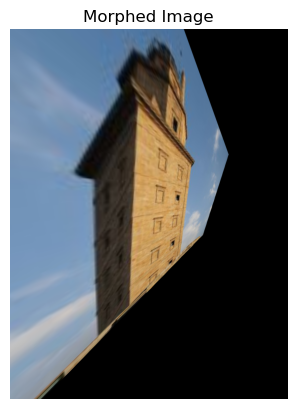

In [4]:
def draw_circle(event,x,y,flags,param):
    '''
    Callback for the get_points function. Draws a point
    on image and stores it on the params.src_points
    '''
    image = param[0]
    src_points = param[1]

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(image,(x,y),circle_radius,circle_color,-1)
        src_points.append((x,y))

def get_points(image):
    '''
    Function that given an image will display it until the user
    inputs 4 points on it. If the user presses the R key the points
    will be resetted
    '''
    src_points = []
    pointed_image = image.copy()
    
    cv2.namedWindow(window_name)
    cv2.imshow(window_name, pointed_image)
    cv2.setMouseCallback(window_name, draw_circle,param=[pointed_image, src_points])

    while(1):
        cv2.imshow(window_name, pointed_image)
        if len(src_points)==4:
            return np.float32(src_points)
        if cv2.waitKey(key_delay)==ord('r'):
            src_points = []
            pointed_image = image.copy()
            cv2.setMouseCallback(window_name, draw_circle,param=[pointed_image, src_points])

def tune_image_perspective(source_image, target_image):
    '''
    Interactive loop that given two images will display them and wait for the user
    to input 4 points on them. After that, it will perform a warp using those points
    as homography.
    
    @inputs:  source_image, target_image
    
    @outputs: None; Saves source_image warped. 
    '''
    while(1):
        src_points = get_points(source_image)
        trg_points = get_points(target_image)
        
        print("Source points:",src_points)
        print("Target points:",trg_points)
        
        h, _ = cv2.findHomography(src_points, trg_points, cv2.RANSAC) 

        trg_y, trg_x, _ = target_image.shape
        img_morphed = cv2.warpPerspective(source_image, h, (trg_y, trg_x))

        cv2.imshow(window_name, img_morphed)
        while(1):
            if cv2.waitKey(key_delay) == ord('s'):       
                print("Saving the image")
                cv2.imwrite('morphed_image.jpg', img_morphed)
                exit(1)
            if cv2.waitKey(key_delay) == ord('r'):       
                print("Repeating the perspective tuning")
                tune_image_perspective(source_image, target_image)

# For convenience sake, the homography defining points were computed in advance, so 
# there is no need to run the tune_image_perspective() function.
# tune_image_perspective(source_image_resize, target_image_overlap)

source_points = np.array([
                    [319. , 167.],
                    [253. , 299.],
                    [558. , 217.],
                    [366. , 736.]
                ])

target_points = np.array([
                    [327. , 166.],
                    [140. , 379.],
                    [514. , 382.],
                    [341. , 762.],
                ])
                    
h, _ = cv2.findHomography(source_points, target_points, cv2.RANSAC) 

trg_y, trg_x, _ = target_image_overlap.shape
morphed_image = cv2.warpPerspective(source_image_resize, h, (trg_y, trg_x))

plt.imshow(morphed_image), plt.title("Morphed Image")
plt.axis('off')
plt.show() 

### Improvements

As we can see, the resulting image could benefit from more tuning. In order to do so, we will modify the previously developed loop to be able to apply another homography to the already warped image. Again, the homography points were computed beforehand.

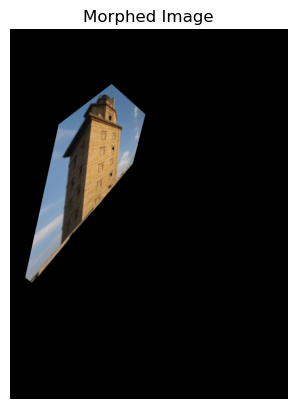

In [5]:
def tune_image_perspective(source_image, target_image):
    '''
    Interactive loop that given two images will display them and wait for the user
    to input 4 points on them. After that, it will perform a warp using those points
    as homography.
    
    @inputs:  source_image, target_image
    
    @outputs: None; Saves source_image warped. 
    '''
    while(1):
        src_points = get_points(source_image)
        trg_points = get_points(target_image)
        
        print("Source points:",src_points)
        print("Target points:",trg_points)
        
        h, _ = cv2.findHomography(src_points, trg_points, cv2.RANSAC) 

        trg_y, trg_x, _ = target_image.shape
        img_morphed = cv2.warpPerspective(source_image, h, (trg_x, trg_y))

        cv2.imshow(window_name, img_morphed)
        while(1):
            if cv2.waitKey(key_delay) == ord('s'):       
                print("Saving the image")
                cv2.imwrite('morphed_image.jpg', img_morphed)
                exit(1)
            if cv2.waitKey(key_delay) == ord('c'):  
                print("Performing another tuning")     
                main_loop(img_morphed, target_image)
            if cv2.waitKey(key_delay) == ord('r'):       
                print("Repeating the perspective tuning")
                tune_image_perspective(source_image, target_image)


def main_loop(source_image, target_image):
    src_y, src_x, _ = source_image.shape
    trg_y, trg_x, _ = target_image.shape

    print(source_image.shape)
    print(target_image.shape)

    source_image_resize = fit_on_dimensions(source_image, trg_y, trg_x)
    src_r_y, src_r_x, _ = source_image_resize.shape


    target_image_moved = fit_on_position(target_image, src_r_y, src_r_x, 85, -75)
    target_image_overlap = cv2.addWeighted(source_image_resize,1, target_image_moved, 0.75, 0.5)

    tune_image_perspective(source_image_resize, target_image_overlap)


trg = cv2.imread(intro_images_path+'torre_hercules_2.jpg')
src = cv2.imread(intro_images_path+'torre_hercules_1.jpg')
#main_loop(src, trg)

source_points = np.array([[262., 306.], [332., 152.], [555., 208.], [359., 737.]])
target_points = np.array([[129., 374.], [353., 145.], [531., 373.], [341., 755.]])
h, _ = cv2.findHomography(source_points, target_points, cv2.RANSAC) 

trg_y, trg_x, _ = target_image_overlap.shape
morphed_image = cv2.warpPerspective(source_image_resize, h, (trg_y, trg_x))

source_points = np.array([[190., 492.], [442., 194.], [707., 495.], [454., 1015.]])
target_points = np.array([[156., 397.], [264., 230.], [481., 287.], [271., 836.]])
h, _ = cv2.findHomography(source_points, target_points, cv2.RANSAC) 

trg_y, trg_x, _ = target_image_overlap.shape
morphed_image = cv2.warpPerspective(morphed_image, h, (trg_y, trg_x))

plt.imshow(morphed_image), plt.title("Morphed Image")
plt.axis('off')
plt.show() 


As we can see now the tower in the image has a more or less fitting point of view. However, in this process we created a lot of black background. In order to fix this, we will develop another interactive loop that given four points will trim the image. Again, this was executed beforehand so we already have the ROI points.

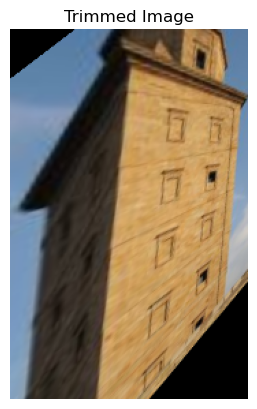

In [10]:
def get_image_roi(source_image):
    '''
    Interactive loop that given an image will display it and wait for the user
    to input 4 points on it. After that, it will perform a trim using those points.
    '''
    src_y, src_x, _ = source_image.shape
    
    while(1):
        trim_points = get_points(source_image)
        min_y, max_y, min_x, max_x = src_y,0,src_x,0
        for point in trim_points:
            y, x = point
            min_y = int(y) if y<min_y else min_y
            min_x = int(x) if x<min_x else min_x
            max_y = int(y) if y>max_y else max_y
            max_x = int(x) if x>max_x else max_x
        print(min_y, max_y, min_x, max_x)
        img_roi = source_image[min_x:max_x,min_y:max_y,:]
        cv2.imshow(window_name, img_roi)
        while(1):
            if cv2.waitKey(key_delay) == ord('s'):       
                print("Saving the image")
                cv2.imwrite('roi_image.jpg', img_roi)
                exit(1)
            if cv2.waitKey(key_delay) == ord('c'):  
                print("Performing another trim")     
                get_image_roi(img_roi)
            if cv2.waitKey(key_delay) == ord('r'):       
                print("Repeating the trim")
                get_image_roi(source_image)

# get_image_roi(morphed_image)

min_y, max_y, min_x, max_x= 141, 315, 227, 498
img_roi = morphed_image[min_x:max_x,min_y:max_y,:]
plt.imshow(img_roi), plt.title("Trimmed Image")
plt.axis('off')
plt.show() 


Now we can see both images side by side. The transformation is not perfect, but with the tools developed and some fine-tuning it can be achieved. 

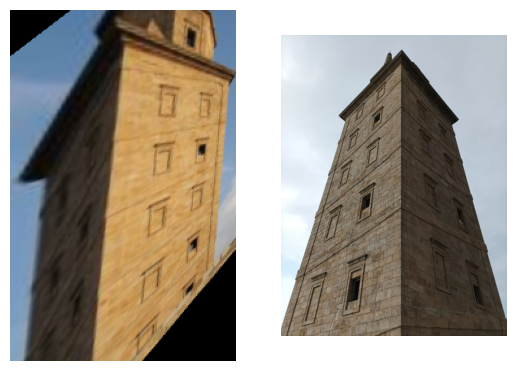

In [19]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img_roi)
plt.axis('off')

f.add_subplot(1,2, 2)
plt.imshow(target_image)
plt.axis('off')

plt.show() 